In [87]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import datetime
import csv
import math
import time
from ProgressBar import ProgressBar

import nltk
import string
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [29]:
CCI = pd.read_csv('CCI.csv')[['TIME','Value']]
CCI.set_index('TIME', inplace=True)
CCI.head()

,Value
TIME,
1960-01,101.5840
1960-02,101.3255
1960-03,101.1023
1960-04,100.9791
1960-05,101.0102


In [32]:
CCIlimited = CCI.iloc[np.where(CCI.index=='2000-01')[0][0]:(np.where(CCI.index=='2006-12')[0]+1)[0]]

In [33]:
CCIlimited.head()

,Value
TIME,
2000-01,102.7499
2000-02,102.8026
2000-03,102.7220
2000-04,102.7036
2000-05,102.6784


In [53]:
CCIlags = CCIlimited.iloc[12:]
CCIlags['Value_lag1'] = CCIlimited.iloc[11:-1].Value.values
CCIlags['Value_lag2'] = CCIlimited.iloc[10:-2].Value.values
CCIlags['Value_lag3'] = CCIlimited.iloc[9:-3].Value.values
CCIlags['Value_lag12'] = CCIlimited.iloc[0:-12].Value.values
CCIlags.head(15)

,Value,Value_lag1,Value_lag2,Value_lag3,Value_lag12
TIME,,,,,
2001-01,101.05250,101.57510,102.10260,102.35390,102.7499
2001-02,100.67050,101.05250,101.57510,102.10260,102.8026
2001-03,100.50560,100.67050,101.05250,101.57510,102.7220
2001-04,100.47250,100.50560,100.67050,101.05250,102.7036
2001-05,100.59540,100.47250,100.50560,100.67050,102.6784
2001-06,100.67430,100.59540,100.47250,100.50560,102.5800
2001-07,100.58840,100.67430,100.59540,100.47250,102.5467
2001-08,100.28710,100.58840,100.67430,100.59540,102.5120
2001-09,99.85295,100.28710,100.58840,100.67430,102.4624


In [69]:
X = CCIlags.iloc[:,[1,2]].values
y = CCIlags.iloc[:,[0]].values

In [70]:
lr = LinearRegression()
lr.fit(X[:-5],y[:-5])
lr.score(X[-5:],y[-5:])

0.94373203689952523

# With news

In [79]:
tfidfDF = pd.read_csv('tfidfDF.csv', index_col=0)
tfidfDF.head()

,10,100,1000,10yr,11,12,125,13,14,15,...,data storag,govern said,bankruptci file,dresdner kleinwort,ernst young,report today,accus them,casualti insur,presid at,secondquart net
2000-01,6.810996,4.722850,1.554004,5.287402,3.835503,3.921624,0.489312,3.474001,1.605717,6.355880,...,0.000000,0.935871,0.181887,0.199304,0.000000,0.984635,0.000000,0.000000,2.324393,0.0
2000-02,6.583431,4.742737,1.332398,6.180199,3.889084,4.531573,1.027934,3.044583,3.051015,4.035100,...,0.528561,0.631476,0.000000,0.000000,0.229263,0.989657,0.219338,1.037755,0.283823,0.0
2000-03,8.076472,5.783177,0.494058,6.885387,4.302596,5.320889,3.089404,2.892607,3.573562,5.835880,...,0.000000,0.901069,0.186887,0.000000,0.555234,0.396185,0.000000,0.178143,0.774355,0.0
2000-04,8.999574,3.264970,1.242531,5.909117,7.005908,7.803033,1.600608,3.841745,6.092838,5.710357,...,0.000000,0.421062,0.000000,0.562987,0.187342,0.934242,0.573487,0.526850,1.104481,0.0
2000-05,8.199903,4.102355,1.358301,5.982233,4.287039,4.297308,2.112467,3.094332,3.251916,6.452769,...,0.000000,1.251087,0.167923,0.000000,0.911436,0.704819,0.192804,0.000000,2.481364,0.0


In [80]:
tfidfLag1 = tfidfDF.iloc[11:-1].values
tfidfLag2 = tfidfDF.iloc[10:-2].values
tfidfLag12 = tfidfDF.iloc[0:-12].values

In [83]:
tfidfLag12.shape

(72, 5956)

In [197]:
X_news = np.hstack((X, tfidfLag1, tfidfLag2))

In [198]:
X_news

array([[ 101.5751    ,  102.1026    ,    8.63333711, ...,    0.40604087,
           1.19570396,    0.        ],
       [ 101.0525    ,  101.5751    ,    6.51194681, ...,    0.21246151,
           1.72852165,    0.        ],
       [ 100.6705    ,  101.0525    ,    6.38861777, ...,    0.        ,
           2.04200127,    0.        ],
       ..., 
       [ 100.0757    ,   99.76016   ,    9.05202296, ...,    0.6954616 ,
           2.70079311,    0.16939271],
       [ 100.4959    ,  100.0757    ,   11.60090168, ...,    0.40604087,
           1.52436876,    0.        ],
       [ 100.7271    ,  100.4959    ,   10.66908092, ...,    0.21246151,
           2.19692662,    0.        ]])

In [203]:
lasso = Lasso(alpha=.2)
lasso.fit(X_news[:-10,2:],y[:-10])
lasso.score(X_news[-10:,2:],y[-10:])

-1.5539535692668971

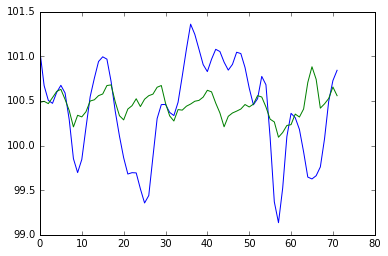

In [204]:
pred = lasso.predict(X_news[:,2:])
plt.plot(range(len(y)), y)
plt.plot(range(len(y)), pred)

In [128]:
len(np.where(lasso.coef_!=0)[0])

4

In [129]:
lasso.coef_

array([  1.23035248e+00,  -4.01381422e-01,   0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -1.15466209e-03,
         2.08317663e-02])

In [118]:
X_news[:-5,[0,1,2,3,4]]

array([[ 101.5751    ,  102.1026    ,    8.63333711,    6.15588702,
           1.58967116],
       [ 101.0525    ,  101.5751    ,    6.51194681,    4.92652169,
           1.69892868],
       [ 100.6705    ,  101.0525    ,    6.38861777,    4.10902438,
           1.18747298],
       [ 100.5056    ,  100.6705    ,    8.45248603,    5.75864973,
           0.62080147],
       [ 100.4725    ,  100.5056    ,    9.79396429,    4.16093603,
           1.12295369],
       [ 100.5954    ,  100.4725    ,    8.16007492,    4.42274197,
           1.47714711],
       [ 100.6743    ,  100.5954    ,    7.17823693,    3.56210057,
           1.04963056],
       [ 100.5884    ,  100.6743    ,    6.33590342,    5.47905487,
           1.16161694],
       [ 100.2871    ,  100.5884    ,    7.75840742,    2.96000653,
           1.13792621],
       [  99.85295   ,  100.2871    ,    6.04053458,    2.2914646 ,
           0.75196816],
       [  99.69643   ,   99.85295   ,    7.53946631,    5.1231662 ,
           0

# Correlated words

In [205]:
tfidfDF.head()

,10,100,1000,10yr,11,12,125,13,14,15,...,data storag,govern said,bankruptci file,dresdner kleinwort,ernst young,report today,accus them,casualti insur,presid at,secondquart net
2000-01,6.810996,4.722850,1.554004,5.287402,3.835503,3.921624,0.489312,3.474001,1.605717,6.355880,...,0.000000,0.935871,0.181887,0.199304,0.000000,0.984635,0.000000,0.000000,2.324393,0.0
2000-02,6.583431,4.742737,1.332398,6.180199,3.889084,4.531573,1.027934,3.044583,3.051015,4.035100,...,0.528561,0.631476,0.000000,0.000000,0.229263,0.989657,0.219338,1.037755,0.283823,0.0
2000-03,8.076472,5.783177,0.494058,6.885387,4.302596,5.320889,3.089404,2.892607,3.573562,5.835880,...,0.000000,0.901069,0.186887,0.000000,0.555234,0.396185,0.000000,0.178143,0.774355,0.0
2000-04,8.999574,3.264970,1.242531,5.909117,7.005908,7.803033,1.600608,3.841745,6.092838,5.710357,...,0.000000,0.421062,0.000000,0.562987,0.187342,0.934242,0.573487,0.526850,1.104481,0.0
2000-05,8.199903,4.102355,1.358301,5.982233,4.287039,4.297308,2.112467,3.094332,3.251916,6.452769,...,0.000000,1.251087,0.167923,0.000000,0.911436,0.704819,0.192804,0.000000,2.481364,0.0


In [218]:
corrs = np.corrcoef(np.hstack((CCIlimited.values , tfidfDF.values)), rowvar=0)

In [221]:
corrs[0]

array([ 1.        , -0.07720349, -0.01705099, ..., -0.04960686,
       -0.0456907 , -0.05670581])

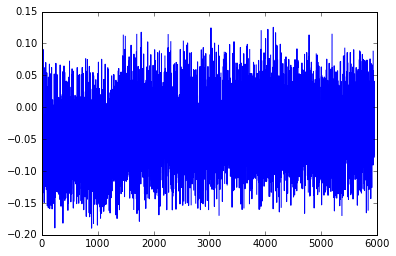

In [225]:
plt.plot(corrs[0][1:])

In [217]:
np.hstack((CCIlimited.values , tfidfDF.values)).shape

(84, 5957)

In [243]:
corrs[0][1:][np.argsort(-np.abs(corrs[0][1:]))[:20]].shape

(20,)

In [245]:
pd.DataFrame(data = corrs[0][1:][np.argsort(-np.abs(corrs[0][1:]))[:20]], index = tfidfDF.columns[np.argsort(-np.abs(corrs[0][1:]))[:20]])

,0
offici,-0.189569
bloomberg,-0.189236
problem,-0.184792
parent,-0.182394
cost,-0.181717
copyright infring,-0.178841
vehicl,-0.174455
regul,-0.174011
motor,-0.171876
lower,-0.171193


In [246]:
pd.DataFrame(data = corrs[0][1:][np.argsort(-(corrs[0][1:]))[:20]], index = tfidfDF.columns[np.argsort(-(corrs[0][1:]))[:20]])

,0
survey releas,0.125359
floyd norri,0.124450
nasdaq trade,0.122161
gold produc,0.120078
statist canada,0.117666
invest firm,0.116817
eke out,0.114455
technolog inc,0.114289
media conglomer,0.113966
vodafon airtouch,0.113395


In [231]:
corrs[0][2349]

nan

In [233]:
-np.nan

nan